# Image Processing - Gaussian Filter

### Configuraciones previas

In [1]:
import os, sys, time, matplotlib.pyplot as plt, PIL.Image as Image

__file__ = os.getcwd()
location_path = __file__

sys.path.append(location_path)
from Scripts.pure_python import GaussianFilter as GaussianFilter_Python
from Scripts.only_numpy import GaussianFilter as GaussianFilter_Numpy
from Scripts.Cython.numpy_cython import GaussianFilter as GaussianFilter_Cython #type: ignore

kernel_size = 15
sigma       = 9.0
ex_times    = []

py_filter = GaussianFilter_Python(kernel_size=kernel_size, sigma=sigma)
np_filter = GaussianFilter_Numpy(kernel_size=kernel_size, sigma=sigma)
cy_filter = GaussianFilter_Cython(kernel_size=kernel_size, sigma=sigma)

### Funciones Previas

In [2]:
def show_images(image1_path, image2_path, title1="Original", title2="Filtrada"):
    """
    Muestra dos imágenes lado a lado en una Jupyter Notebook.

    Args:
        image1_path (str): Ruta de la primera imagen.
        image2_path (str): Ruta de la segunda imagen.
        title1 (str): Título de la primera imagen. (Opcional)
        title2 (str): Título de la segunda imagen. (Opcional)
    """
    img1 = Image.open(image1_path)
    img2 = Image.open(image2_path)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    axes[0].imshow(img1, cmap='gray')
    axes[0].set_title(title1)
    axes[0].axis("off")

    axes[1].imshow(img2, cmap='gray')
    axes[1].set_title(title2)
    axes[1].axis("off")
    
    plt.show()

def ejecutar_proceso(filtro,tipo:str):
    images = filtro.load_images()
    filtered_images = filtro.apply_filter(images)
    filtro.save_images(filtered_images)
    
    original = os.path.join(location_path,"Files","Input","gato.jpg")
    if tipo == 'py':   filtrada = os.path.join(location_path,"Files","Output","Pure_python","blurred_gato.jpg")
    elif tipo == 'np': filtrada = os.path.join(location_path,"Files","Output","Only_numpy","blurred_gato.jpg")
    elif tipo == 'cy': filtrada = os.path.join(location_path,"Files","Output","Cython_numpy","blurred_gato.jpg")

    show_images(original,filtrada)
    


### Pruebas - Pure Python

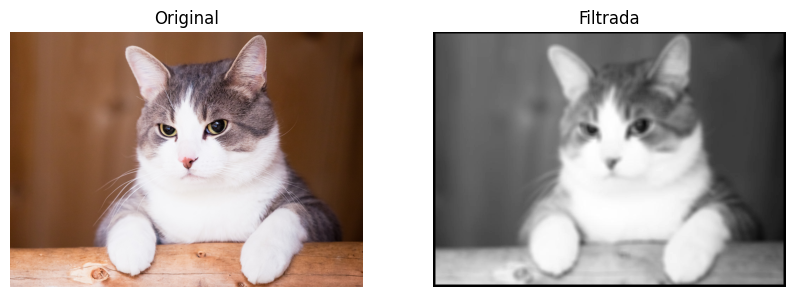

Execution time: 18.886364


In [3]:
ex_time = time.time()

ejecutar_proceso(py_filter,'py')

ex_time = time.time() - ex_time

ex_times.append(ex_time)

print(f"Execution time: {ex_time:.06f}")

### Pruebas - Only Numpy

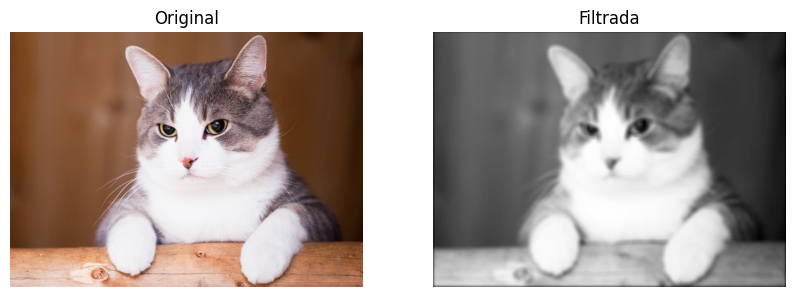

Execution time: 3.666745


In [4]:
ex_time = time.time()

ejecutar_proceso(np_filter,'np')

ex_time = time.time() - ex_time

ex_times.append(ex_time)

print(f"Execution time: {ex_time:.06f}")

### Pruebas - Numpy + Cython

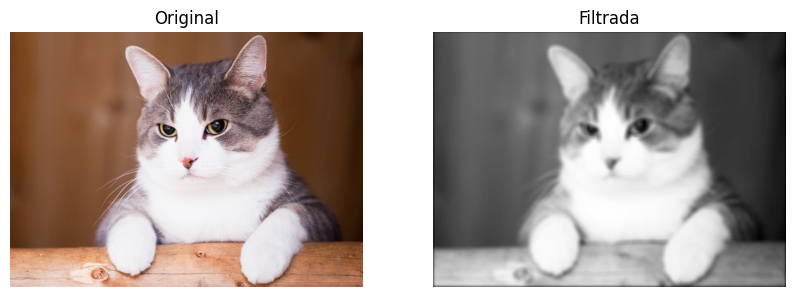

Execution time: 3.597848


In [5]:
ex_time = time.time()

ejecutar_proceso(cy_filter,'cy')

ex_time = time.time() - ex_time

ex_times.append(ex_time)

print(f"Execution time: {ex_time:.06f}")

### Resultados

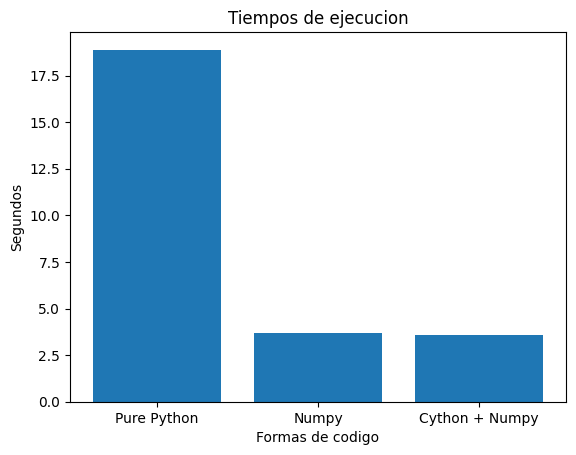

In [6]:
categorias = ['Pure Python','Numpy','Cython + Numpy']

plt.bar(categorias,ex_times)

plt.xlabel('Formas de codigo')
plt.ylabel('Segundos')
plt.title('Tiempos de ejecucion')

plt.show()
